# Basic approach for measurement uncertainty evalaution
First name: principle modelling (PM)
# Contribution to CIE2023 in Ljubljana
# Animations

In [1]:
from empir19nrm02.spectral.spectral_data import _CORR_PATH
from empir19nrm02.MC import load_from_excel, load_from_csv, StatDataVector
from empir19nrm02.MC import MCVectorVar, NameUnit, DistributionParam

from glob import glob
import os
from matplotlib import pyplot, ticker
from empir19nrm02.tools import label_font_size, save_fig, plotCorrelation

import numpy as np
import luxpy as lx
import time
from IPython import display
%matplotlib inline

out_dir = 'PM_Animations'

# Show correlation

In [2]:
import matplotlib.animation as animation

# THX: https://chat.openai.com/share/4e1d08f5-87b2-468e-a9a2-bd825f457ca5

# Function to generate correlated data
def generate_correlated_data(size, correlation):
    mean = [0, 0]
    cov = [[1, correlation], [correlation, 1]]
    x, y = np.random.multivariate_normal(mean, cov, size).T
    return x, y

# Function to update the plot in the animation
def update_plot(frame, x, y, line):
    line.set_data(x[:frame], y[:frame])
    return line,

def test():
    # Animation settings
    frames = 100
    interval = 100  # milliseconds between frames

    # Generate correlated data with different correlation values
    correlations = [0, 0.5, 0.8, -0.5, -0.8]
    fig, ax = pyplot.subplots()

    # Set axis limits based on data range
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)

    # Initialize the line object
    line, = ax.plot([], [], 'bx', lw=2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # Create a list of artists to be animated
    artists = [line]

    # Start the animation
    for correlation in correlations:
        x, y = generate_correlated_data(frames, correlation)
        title = f"Correlation = {correlation:.1f}"
        ax.set_title(title)
        ani = animation.FuncAnimation(fig, update_plot, frames=frames,
                                      fargs=(x, y, line), blit=True,
                                      interval=interval, repeat=False)

        # Save the animation as a video file
        filename = f"{out_dir}/correlation_animation_{correlation}.gif"
        #ani.save(filename, writer='ffmpeg', dpi=100)
        ani.save(filename, dpi=100)

    pyplot.show()

#test()

# Show Correlations with marginal distributions
To explain that the marginal distribtions will not change while introducing correlations.

MovieWriter ffmpeg unavailable; using Pillow instead.


196


C:\Users\udo.krueger\AppData\Local\Temp\ipykernel_19444\3352165283.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[1, 0])
C:\Users\udo.krueger\AppData\Local\Temp\ipykernel_19444\3352165283.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot(gs[0, 0], sharex=ax1)
C:\Users\udo.krueger\AppData\Local\Temp\ipykernel_19444\3352165283.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax3 = plt.subplot(gs[1, 1], sharey=ax1)


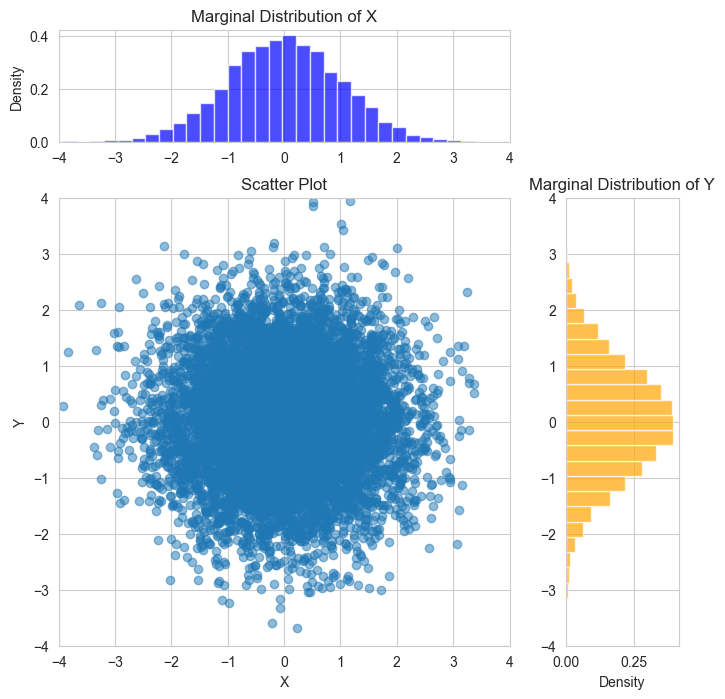

MovieWriter ffmpeg unavailable; using Pillow instead.
C:\Users\udo.krueger\AppData\Local\Temp\ipykernel_19444\3352165283.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[1, 0])
C:\Users\udo.krueger\AppData\Local\Temp\ipykernel_19444\3352165283.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot(gs[0, 0], sharex=ax1)
C:\Users\udo.krueger\AppData\Local\Temp\ipykernel_19444\3352165283.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax3 = plt.subplot(gs[1, 1], sharey=ax1)


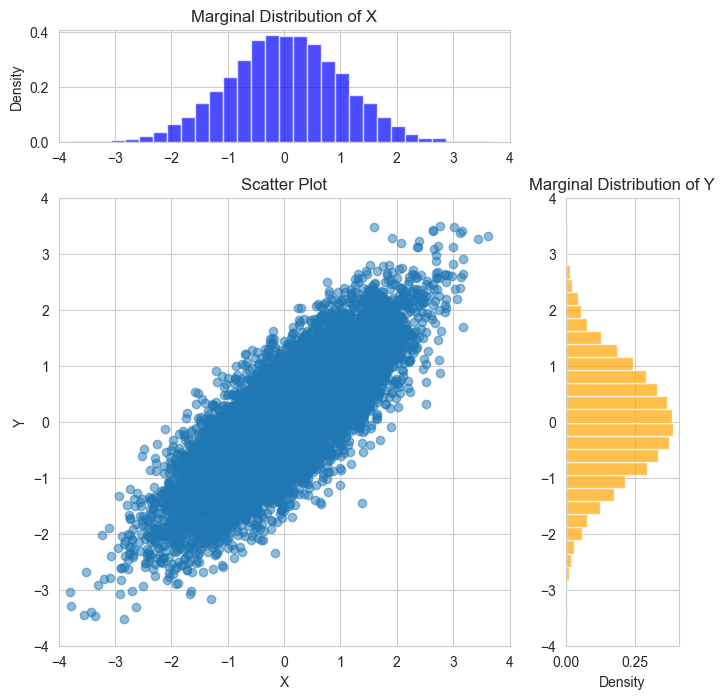

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

# Set the random seed for reproducibility
np.random.seed(42)

# Number of data points for each frame
num_points = 10000

factor = int(num_points/(50+1))
print( factor)

# Function to update the animation frames
def update(frame):
    plt.cla()

    # Scatter plot of the random data
    gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4])
    ax1 = plt.subplot(gs[1, 0])
    if frame > 0:
        ax1.scatter(x[:factor*frame], y[:factor*frame], alpha=0.5)
    ax1.set_xlabel('X')
    ax1.set_xlim([-4,4])
    ax1.set_ylim([-4,4])
    ax1.set_ylabel('Y')
    ax1.set_title('Scatter Plot')

    # Plot the marginal distributions as histograms
    ax2 = plt.subplot(gs[0, 0], sharex=ax1)
    if frame > 0:
        ax2.hist(x[:factor*frame], bins=30, density=True, alpha=0.7, color='blue', orientation='vertical')
    ax2.set_ylabel('Density')
    ax2.set_title('Marginal Distribution of X')

    ax3 = plt.subplot(gs[1, 1], sharey=ax1)
    if frame > 0:
        ax3.hist(y[:factor*frame], bins=30, density=True, alpha=0.7, color='orange', orientation='horizontal')
    ax3.set_xlabel('Density')
    ax3.set_title('Marginal Distribution of Y')


# Set up the figure and animation
for c in [0, 0.8]:
    # Generate new random data for each frame
    x, y = generate_correlated_data(num_points, c)
    fig = plt.figure(figsize=(8, 8))
    ani = animation.FuncAnimation(fig, update, frames=50, interval=200, blit=False)
    ani.save(f"{out_dir}/animation_correlation_scatter_{100*c:.0f}.gif", dpi=100)
    # Display the animation
    plt.show()

In [4]:
# Expand the standard deviation from the file to make effects more visible
std_factor = 10
# comma or point as decimal separator (True--> CIE, False-->LRT)
use_comma = False
if use_comma:
    dec_sep = ','
else:
    dec_sep = '.'

# number of trials for the MCS
NumberTrials = 100000

# number of images for the animation
NumberImages = 25

# Show the results of the MCS in some log. scaled steps
TrialsRange = np.logspace(0.5, np.log10(NumberTrials-1), NumberImages, dtype=int, endpoint=True)
print( TrialsRange)

# Images per second
frame_rate = 5
aspect_ratio = 16/9
vertical_res = 768
frame_size = (int(vertical_res*aspect_ratio), int(vertical_res))

x_label = 'Wavelength, $\lambda$ / nm'
y_label = 'Signal $S$ / A.U.'
y_label_diff = r'Signal diff. $S-\bar{S}$ / A.U.'

# Number of base functions
highRes = 1
if highRes == 0:
    wl = lx.getwlr([360,830,5])
    len_wl = len(wl)
    elements2Run = [-1, 0,1,2,3,4,5,6,7,8,9,10,20,30,int(len_wl/2)]
else:
    wl = lx.getwlr([360,830,1])
    len_wl = len(wl)
    # new elements2Run (see logscale.xlsx for a linear distribution of values in a log scale format)
    elements2Run = [-1, 0,1,2,3,4,5,6,7,8,9,10,11,12,15,19,24,30,38,48,60,75,95,119,149,187,235]
print( elements2Run)


[    3     4     7    11    17    27    42    64    99   153   237   365
   562   865  1333  2053  3162  4869  7498 11547 17782 27383 42169 64937
 99998]
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 19, 24, 30, 38, 48, 60, 75, 95, 119, 149, 187, 235]


In [5]:
marker = ['-', '--', '-.', ':', '.', 'o', '-', '--', '-.', ':', '.']
point_marker = ['x', 'o', 'v', '^']
mColor = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'r', 'g', 'b', 'c']

if use_comma:
    #Locale settings
    import locale

    # Set to German locale to get comma decimal separater
    locale.setlocale(locale.LC_NUMERIC, "de_DE")
# Benutzerdefinierter Stil definieren
plot_style = {
    'axes.spines.top': True,
    'axes.spines.bottom': True,
    'axes.spines.left': True,
    'axes.spines.right': True,
    'axes.linewidth': 1,
    'axes.edgecolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'xtick.major.width': 1,
    'ytick.major.width': 1,
    'xtick.major.size': 2,
    'ytick.major.size': 2,
    'axes.grid': False,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'xtick.bottom': True,
    'ytick.left': True,
}

# Stil aktivieren
pyplot.style.use(plot_style)
if use_comma:
    # Tell matplotlib to use the locale we set above
    pyplot.rcParams['axes.formatter.use_locale'] = True

def custom_decimal(value_str):
    # Split the string into integer and decimal parts
    integer_part, decimal_part = value_str.split('.')
    # Add spaces after every third character in the integer part
    decimal_part_formatted = " ".join([decimal_part[i:i+3] for i in range(0, len(decimal_part), 3)])
    # Join the formatted integer part with the decimal part and return the result
    formatted_value = integer_part + dec_sep + decimal_part_formatted

    return formatted_value

def custom_color(x,pos):
    value_str = f"{x:,.{4}f}"
    return custom_decimal(value_str)
def custom_color1(x,pos):
    value_str = f"{x:,.{5}f}"
    return custom_decimal(value_str)

def custom_formatter(x, pos):
    # Convert the float to a string
    value_str = f"{x:,.{0}f}"

    # Split the string into integer and decimal parts
    integer_part, decimal_part = value_str.split('.')

    # Add spaces after every third character in the integer part
    decimal_part_formatted = " ".join([decimal_part[i:i+3] for i in range(0, len(decimal_part), 3)])
    # Add spaces after every third character in the integer part
    #integer_part_formatted = integer_part.replace(",", " ")
    integer_part_formatted = integer_part
    #integer_part_formatted = " ".join([integer_part[i:i+3] for i in range(0, len(integer_part), 3)])

    # Join the formatted integer part with the decimal part and return the result
    formatted_value = integer_part_formatted + dec_sep + decimal_part_formatted

    return formatted_value

In [6]:

def plotMCResult( wl, mcVarData:StatDataVector, title=None, fig = None, ax1 = None, ax2 = None, diagnumber=0, band=False):
    bFirst = False
    if not fig:
        fig, ax1 = pyplot.subplots()
        ax2 = ax1.twinx()
        color1 = 'r-'
        color1f = 'r'
        color2 = 'g:'
    else:
        if diagnumber == 1:
            color1 = 'r-'
            color1f = 'r'
            color2 = 'g:'
        else:
            color1 = 'r--'
            color1f = 'r'
            color2 = 'g-.'

    if not title:
        title = ''
    rel_data = mcVarData.v_mean/np.max(mcVarData.v_mean)
    std_data = mcVarData.v_std/np.max(mcVarData.v_mean)
    ax1.plot(wl, rel_data, color1, label= title + ' $S_{\mathrm{rel}}(\lambda)$')
    if band is True:
      ax1.fill_between(wl, rel_data - 2*std_data, rel_data + 2*std_data, alpha=0.1, color=color1f, label='Expanded Uncertainty')
    if ax2 is not None:
        ax2.plot(wl,mcVarData.v_std / mcVarData.v_mean, color2, label= title + ' $u_{\mathrm{rel}}(S_{\mathrm{rel}})(\lambda)$')
    ax1.set_xlabel(x_label,fontsize=label_font_size)
    ax1.set_ylabel(y_label, color = 'red',fontsize=label_font_size)
    if ax2 is not None:
        ax2.set_ylabel('$\sigma_{\mathrm{rel}}$', color = 'green',fontsize=label_font_size)
    if title:
        ax1.set_title(title)
    if ax2 is not None:
        ax2.yaxis.set_major_formatter(ticker.FuncFormatter(custom_color))
    #fig.legend(bbox_to_anchor=(.6,.6), loc="upper left", frameon=False, fontsize=label_font_size)
    ax1.set_ylim((0, 1.1))
    return fig, ax1, ax2

# Load data to generate a SD

FEL integral data: CCT: [[3.0777e+03]] K, Duv: [[2.0527e-04]]


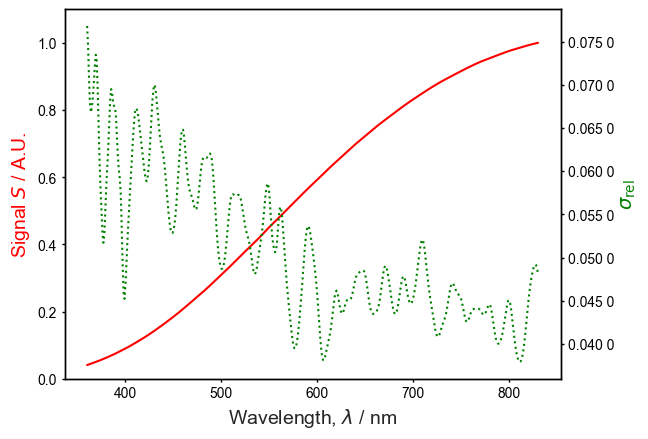

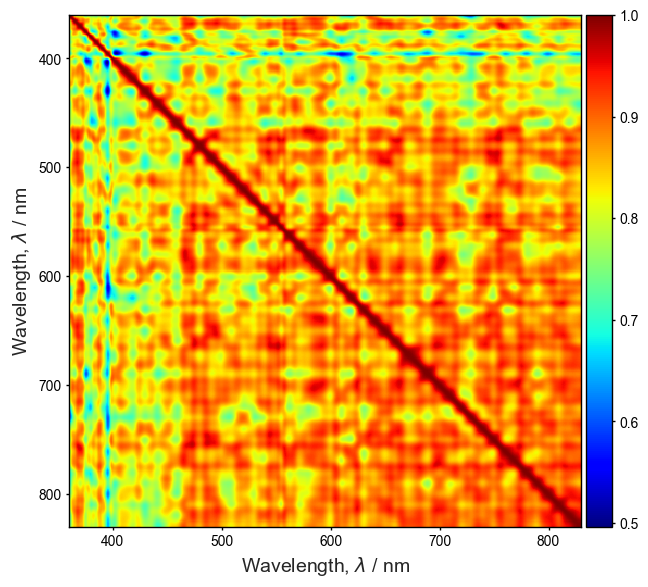

In [7]:
file_list = glob(_CORR_PATH + "PTBResFEL-1000W-Lamp-1.csv", recursive = False)
file = file_list[0]
if 'xls' in file:
    wlFEL, mcVectorVarFEL = load_from_excel(filename= file, wlColumn = 1, valColumn=2, stdColumn = 3, covColumn=None, corrColumn = 4, startRow=2)
else:
    wlFEL, mcVectorVarFEL = load_from_csv(filename= file)
    XYZ_FEL = lx.spd_to_xyz(np.vstack((wlFEL, mcVectorVarFEL.setData.v_mean)), relative=False)
    CCT_FEL, duv_FEL = lx.xyz_to_cct(XYZ_FEL, out = 'cct,duv')
    print( f"FEL integral data: CCT: {CCT_FEL} K, Duv: {duv_FEL}")

mcVectorVarFEL.set_vector_param(mcVectorVarFEL.setData.v_mean,std_factor*mcVectorVarFEL.setData.v_std, corr=mcVectorVarFEL.setData.corr_matrix)

mcVectorVarFEL.interpolate(wl, wlFEL, trials=NumberTrials)

file_base = os.path.basename(file)
fig, ax1, ax2 = plotMCResult(wl, mcVectorVarFEL.setData)
save_fig(out_dir, filename='FEL')
#fig.legend(bbox_to_anchor=(1,1), loc="upper left")
plotCorrelation(mcVectorVarFEL.setData.corr_matrix, wl, '', x_label=x_label, y_label=x_label)
save_fig(out_dir, filename='CorrFEL')

mcVectorVarFEL.name = NameUnit('\mathrm{FEL\enspace} \mathbf{S}', '')

In [8]:
v_std = mcVectorVarFEL.setData.v_std

mcVectorVarFEL_uc_add = MCVectorVar( name=NameUnit('\mathrm{FEL\enspace} \mathbf{S}_{\mathrm{a-uc}}', ''), elements=len(wl))
mcVectorVarFEL_uc_add.set_vector_param(mcVectorVarFEL.setData.v_mean, v_std)
mcVectorVarFEL_uc_add.generate_numbers(NumberTrials)

mcVectorVarFEL_uc_mul = MCVectorVar( name=NameUnit('\mathrm{FEL\enspace} \mathbf{S}_{\mathrm{m-uc}}', ''), elements=len(wl))
mcVectorVarFEL_uc_mul.set_vector_param(mcVectorVarFEL.setData.v_mean, v_std)
mcVectorVarFEL_uc_mul.generate_numbers(NumberTrials)

mcVectorVarFEL_c_add = MCVectorVar( name=NameUnit('\mathrm{FEL\enspace} \mathbf{S}_{\mathrm{a-c}}', ''), elements=len(wl), noise_list={ 'c_add': DistributionParam(mean = 0, stddev = np.mean(v_std), distribution = 'normal')})
mcVectorVarFEL_c_add.set_vector_param(mcVectorVarFEL.setData.v_mean, v_std)
mcVectorVarFEL_c_add.generate_numbers(NumberTrials)

mcVectorVarFEL_c_mul = MCVectorVar( name=NameUnit('\mathrm{FEL\enspace} \mathbf{S}_{\mathrm{m-c}}', ''), elements=len(wl), noise_list={ 'c_mul': DistributionParam(mean = 0, stddev = np.mean(v_std)/np.mean(mcVectorVarFEL.setData.v_mean), distribution = 'normal')})
mcVectorVarFEL_c_mul.set_vector_param(mcVectorVarFEL.setData.v_mean, v_std)
mcVectorVarFEL_c_mul.generate_numbers(NumberTrials)

N_Fourier = 'f 3'

mcVectorVarFEL_f = MCVectorVar( name=NameUnit('\mathrm{FEL\enspace} \mathbf{S}_{\mathrm{m-b}}', ''), elements=len(wl), noise_list={ 'f_mul': DistributionParam(mean = 1, stddev = np.mean(v_std)/np.mean(mcVectorVarFEL.setData.v_mean), distribution = 'normal', add_params=N_Fourier)})
mcVectorVarFEL_f.set_vector_param(mcVectorVarFEL.setData.v_mean, v_std)
mcVectorVarFEL_f.generate_numbers(NumberTrials)

N_Fourier_1f = 'f 3 1f'

mcVectorVarFEL_f_1f = MCVectorVar( name=NameUnit('\mathrm{FEL\enspace} \mathbf{S}_{\mathrm{m-b}}', ''), elements=len(wl), noise_list={ 'f_mul': DistributionParam(mean = 1, stddev = np.mean(v_std)/np.mean(mcVectorVarFEL.setData.v_mean), distribution = 'normal', add_params=N_Fourier_1f)})
mcVectorVarFEL_f_1f.set_vector_param(mcVectorVarFEL.setData.v_mean, v_std)
mcVectorVarFEL_f_1f.generate_numbers(NumberTrials)

In [9]:

from empir19nrm02.tools import confidence_ellipse, get_data_step
import cv2


def plotMCSingle( wl, mcSingleData, i, fig = None, ax1 = None, color1='g-', band = False):
    disp_norm = np.max(np.mean(mcSingleData.val, axis=0))
    disp_mean = np.mean(mcSingleData.val[:i], axis=0)
    disp_std = np.std(mcSingleData.val[:i], axis=0)
    ax1.plot(wl, mcSingleData.val[i]/disp_norm, color1, label= '$S_{\mathrm{rel}}(\lambda)[' + str(i) + '$')
    ax1.fill_between(wl, disp_mean/disp_norm - 2*disp_std/disp_norm, disp_mean/disp_norm + 2*disp_std/disp_norm, color='g', label='Expanded Uncertainty', alpha=0.2)

def plotMCSingleDiff( wl, mcSingleData, i, fig = None, ax1 = None, color1='g-', band = False):
    disp_mean = np.mean(mcSingleData.val[:i], axis=0)
    disp_std = np.std(mcSingleData.val[:i], axis=0)
    diff_data = mcSingleData.val[i]-disp_mean
    ax1.plot(wl, diff_data, color1, label= '$S_{\mathrm{rel}}(\lambda)[' + str(i) + '$')
    if band is True:
        ax1.fill_between(wl, - 2*disp_std, 2*disp_std, color='g',
            label='Expanded Uncertainty', alpha=0.2)
    ax1.set_ylim((-0.02, 0.02))
    ax1.set_xlabel(x_label, fontsize=label_font_size)
    ax1.set_ylabel(y_label_diff, fontsize=label_font_size)


def plotMCxy(wl, mcData, i, fig=fig, ax1=None, center_data=True, marker_color = 'r', number=None, k_display = 1, grid=True):
    XYZ = lx.spd_to_xyz(np.vstack((wl, mcData.val[:i])))
    Lxy=lx.xyz_to_Yxy(XYZ)

    data_x = Lxy[:, 1].copy()
    data_y = Lxy[:, 2].copy()
    if center_data:
        data_x = data_x - np.mean(data_x)
        data_y = data_y - np.mean(data_y)
    if number:
        _, step = get_data_step(len(data_x), number)
        ax1.plot(data_x[::step], data_y[::step], marker_color + 'x')
    # display the mean value
    ax1.plot([np.mean(data_x)], [np.mean(data_y)], 'g' + 'o', markersize=10)
    confidence_ellipse(data_x, data_y, ax1, n_std=k_display*2.45, edgecolor='b', linewidth=2)
    ax1.grid(visible=grid)
    #ax1.legend()
    if center_data:
        ax1.set_xlabel(r'$x-\bar{x}$', fontsize=label_font_size)
        ax1.set_ylabel(r'$y-\bar{y}$', fontsize=label_font_size)
    else:
        ax1.set_xlabel(r'$x$', fontsize=label_font_size)
        ax1.set_ylabel(r'$y$', fontsize=label_font_size)
    ax1.set_xlim([-0.02, 0.02])
    ax1.set_ylim([-0.02, 0.02])
    ax1.set_aspect('equal')

mcList = [mcVectorVarFEL, mcVectorVarFEL_uc_add, mcVectorVarFEL_uc_mul, mcVectorVarFEL_c_add, mcVectorVarFEL_c_mul, mcVectorVarFEL_f, mcVectorVarFEL_f_1f]
mcListName = ['PTB', 'a-uc', 'm-uc', 'a-c', 'm-c', 'm-b', 'm-b_1f']

def init_video( file_name, frame_rate, frame_size):
    # generate video writer
    print(file_name)
    fourcc = cv2.VideoWriter_fourcc(*'X264')
    #fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    video_writer = cv2.VideoWriter(file_name, fourcc, frame_rate, frame_size)
    return video_writer

def video_write_image( video_writer):
    # save the current frame
    pyplot.savefig('temp_frame.png')
    # load the current frame and save to the video
    frame = cv2.imread('temp_frame.png')
    frame = cv2.resize(frame, frame_size)
    video_writer.write(frame)

def close_video( video_writer):
    # close videowirter
    video_writer.release()
    cv2.destroyAllWindows()

b_video = True
for j, mcData in enumerate( mcList):
    if b_video:
        video_writer = init_video(f"{out_dir}/FEL_{mcListName[j]}.mp4", frame_rate, frame_size)
    for i in TrialsRange:
        if not b_video:
            display.clear_output(wait=True)
        fig, ax = pyplot.subplots(2,2,figsize=(frame_size[0]/100, frame_size[1]/100))
        str_title = f"MC: ${mcData.name.name}$ with Trials: {i}"
        pyplot.suptitle(str_title)
        plotMCResult(wl, mcData.setData, fig=fig, ax1=ax[0,0])
        plotMCSingle(wl, mcData, i, fig=fig, ax1=ax[0,0])
        plotMCSingleDiff(wl, mcData, i, fig=fig, ax1=ax[0,1], band=True)
        plotMCxy(wl, mcData, i, fig=fig, ax1=ax[1,0],number=i)
        if i > 5:
            tmp_data = mcData.val[:i]
            print( tmp_data.shape)
            corr_matrix = np.corrcoef(mcData.val[:i,:].T)
            plotCorrelation(corr_matrix, wl, '', x_label=x_label, y_label=x_label, fig=fig, ax1=ax[1,1], vmin=0, vmax=1)
        if b_video:
            video_write_image(video_writer)
            # delete temp files
            pyplot.clf()
            pyplot.cla()
            pyplot.close()
        else:
            display.display(pyplot.gcf())
            save_fig(out_dir, filename=f"{mcListName[j]}_{i}")
    if b_video:
        close_video( video_writer)


PM_Animations/FEL_PTB.mp4
(7, 471)
(11, 471)
(17, 471)
(27, 471)
(42, 471)
(64, 471)
(99, 471)
(153, 471)
(237, 471)
(365, 471)
(562, 471)
(865, 471)
(1333, 471)
(2053, 471)
(3162, 471)
(4869, 471)
(7498, 471)
(11547, 471)
(17782, 471)
(27383, 471)
(42169, 471)
(64937, 471)
(99998, 471)
PM_Animations/FEL_a-uc.mp4
(7, 471)
(11, 471)
(17, 471)
(27, 471)
(42, 471)
(64, 471)
(99, 471)
(153, 471)
(237, 471)
(365, 471)
(562, 471)
(865, 471)
(1333, 471)
(2053, 471)
(3162, 471)
(4869, 471)
(7498, 471)
(11547, 471)
(17782, 471)
(27383, 471)
(42169, 471)
(64937, 471)
(99998, 471)
PM_Animations/FEL_m-uc.mp4
(7, 471)
(11, 471)
(17, 471)
(27, 471)
(42, 471)
(64, 471)
(99, 471)
(153, 471)
(237, 471)
(365, 471)
(562, 471)
(865, 471)
(1333, 471)
(2053, 471)
(3162, 471)
(4869, 471)
(7498, 471)
(11547, 471)
(17782, 471)
(27383, 471)
(42169, 471)
(64937, 471)
(99998, 471)
PM_Animations/FEL_a-c.mp4
(7, 471)
(11, 471)
(17, 471)
(27, 471)
(42, 471)
(64, 471)
(99, 471)
(153, 471)
(237, 471)
(365, 471)
(562, 

Value= [0.018184230766475844, 0.001105900502635205] Inteval(95%)= 0.0042990196111138 U= 0.0021495098055569


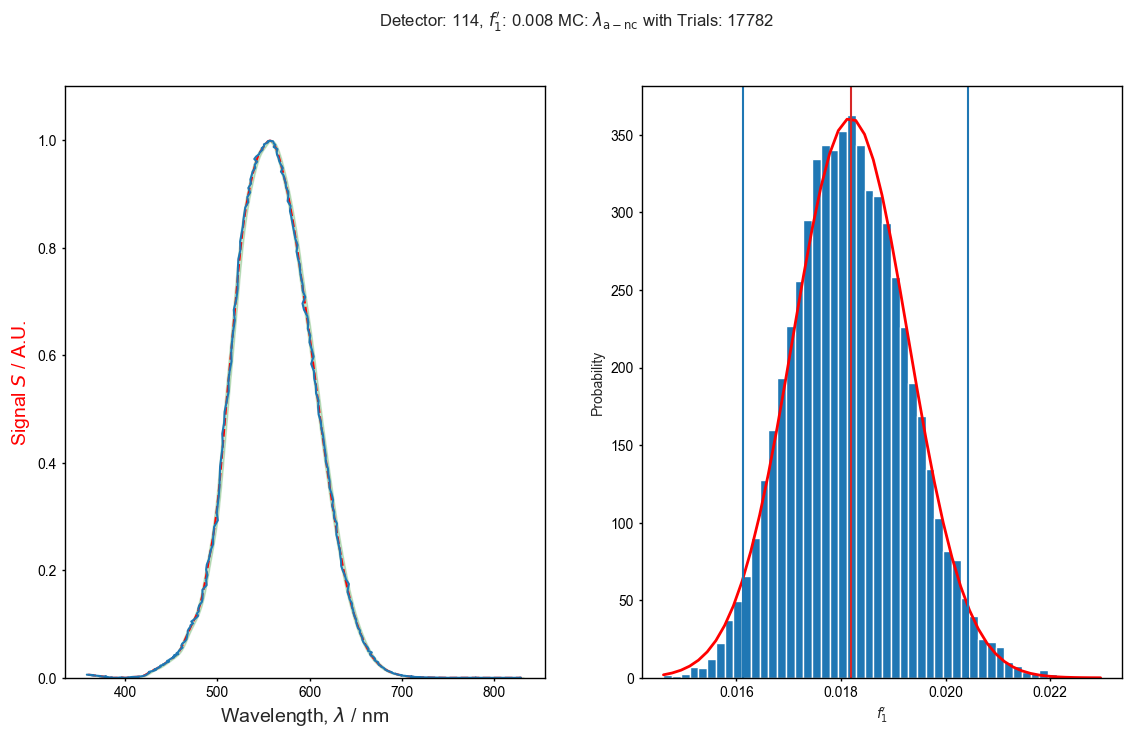

In [ ]:
from luxpy.toolboxes.spectral_mismatch_and_uncertainty import f1prime
from empir19nrm02.tools.plotting import plotHistScales
from empir19nrm02 import _SPD, _RES

def plotMCResultWl( mcVarData:StatDataVector, data_y, title=None, fig = None, ax1 = None, ax2 = None, diagnumber=0, band=False):
    bFirst = False
    if not fig:
        fig, ax1 = pyplot.subplots()
        ax2 = ax1.twinx()
        color1 = 'r-'
        color1f = 'r'
        color2 = 'g:'
    else:
        if diagnumber == 1:
            color1 = 'r-'
            color1f = 'r'
            color2 = 'g:'
        else:
            color1 = 'r--'
            color1f = 'r'
            color2 = 'g-.'

    if not title:
        title = ''
    rel_data = mcVarData.runData.v_mean
    std_data = mcVarData.runData.v_std

    ax1.plot(rel_data, data_y, color1, label= title + ' $S_{\mathrm{rel}}(\lambda)$')
    if band is True:
      ax1.fill_betweenx(data_y, rel_data - 2*std_data, rel_data + 2*std_data, alpha=0.1, color=color1f, label='Expanded Uncertainty')
    if ax2 is not None:
        ax2.plot(wl,mcVarData.v_std / mcVarData.v_mean, color2, label= title + ' $u_{\mathrm{rel}}(S_{\mathrm{rel}})(\lambda)$')
    ax1.set_xlabel(x_label,fontsize=label_font_size)
    ax1.set_ylabel(y_label, color = 'red',fontsize=label_font_size)
    if ax2 is not None:
        ax2.set_ylabel('$\sigma_{\mathrm{rel}}$', color = 'green',fontsize=label_font_size)
    if title:
        ax1.set_title(title)
    if ax2 is not None:
        ax2.yaxis.set_major_formatter(ticker.FuncFormatter(custom_color))
    #fig.legend(bbox_to_anchor=(.6,.6), loc="upper left", frameon=False, fontsize=label_font_size)
    ax1.set_ylim((0, 1.1))
    return fig, ax1, ax2

def plotMCSingleWl( mcVarData:StatDataVector, data_y,  i, fig = None, ax1 = None, color1='g-', band = False):
    disp_mean = np.mean(mcVarData.val[:i], axis=0)
    disp_std = np.std(mcVarData.val[:i], axis=0)
    ax1.plot(mcVarData.val[i], data_y, label= '$S_{\mathrm{rel}}(\lambda)[' + str(i) + '$')
    if band is True:
        ax1.fill_betweenx(data_y, disp_mean - 2*disp_std, disp_mean + 2*disp_std, color='g', label='Expanded Uncertainty', alpha=0.2)

def plotMCHist(wlData, respData, i, fig=fig, ax1=None, center_data=True, marker_color = 'r', number=None, k_display = 1, grid=True, bins=50):

    f1p = np.zeros(i)
    for ii in range(i):
        f1p[ii] = f1prime(np.vstack((wlData.val[ii], respData)))[0]

    data = f1p.copy()
    if center_data:
        data = data - np.mean(data)
    return plotHistScales(data, fig, ax1, title=None, xLabel='$f_1^\prime$', yLabel='Probability', add_distribution=True, bins=bins)

selected_Detector = 73
_detectors=_RES['VLDetectors']['S']['data'].copy()

sigma_wl = 1

_detectors_i = lx.cie_interp(_detectors, wl_new=wl, kind='S')
s_target = _detectors_i[1]

#for i in range(1, _detectors_i.shape[0]):
#    print( f"{i}, {f1prime(np.vstack((wl, _detectors_i[i])))[0]}")


mcLambda_nc_add = MCVectorVar( name=NameUnit('\lambda_\mathrm{a-nc}', 'nm'), elements=len(wl), noise_list={ 'nc_add': DistributionParam(mean = 0, stddev = sigma_wl, distribution = 'normal')})
mcLambda_nc_add.set_vector_param(wl, 0*wl)

mcLambda_nc_add.generate_numbers(NumberTrials)

mcLambda_c_add = MCVectorVar( name=NameUnit('\lambda_\mathrm{a-c}', 'nm'), elements=len(wl), noise_list={ 'c_add': DistributionParam(mean = 0, stddev = sigma_wl, distribution = 'normal')})
mcLambda_c_add.set_vector_param(wl, 0*wl)
mcLambda_c_add.generate_numbers(NumberTrials)

N_Fourier = 'f 3'

mcLambda_f = MCVectorVar( name=NameUnit('\lambda_\mathrm{a-b}', ''), elements=len(wl), noise_list={ 'f_add': DistributionParam(mean = 1, stddev = sigma_wl, distribution = 'normal', add_params=N_Fourier)})
mcLambda_f.set_vector_param(wl, wl*0)
mcLambda_f.generate_numbers(NumberTrials)

mcDataLambdaList = [mcLambda_nc_add, mcLambda_c_add, mcLambda_f]
#mcDataLambdaList = [mcLambda_nc_add]

# video with 5nm and sensitivity with 1nm
if sigma_wl > 1:
    b_video = True
else:
    b_video = False

detectorList = [1, 114, 33]
#detectorList = [1]

bins = 50
f1pHist = np.ndarray((len(detectorList), len(mcDataLambdaList), 2, bins))
f1pStat = np.ndarray((len(detectorList), len(mcDataLambdaList),2))

for i_detector, detector in enumerate(detectorList):
    currentDetector = _detectors_i[detector]
    f1p0 = f1prime(np.vstack((wl, currentDetector)))[0]

    for j, mcDataLambda in enumerate( mcDataLambdaList):
        if b_video:
            video_writer = init_video(f"{out_dir}/f1prime_{str(detector)}_{str(j)}.mp4", frame_rate, frame_size)
        for i in TrialsRange:
        #for i in [1000]:
            if not b_video:
                display.clear_output(wait=True)
            fig, ax = pyplot.subplots(1,2,figsize=(frame_size[0]/100, frame_size[1]/100))
            pyplot.suptitle(f"Detector: {detector}, $f_1^\prime$: {f1p0:.3f} MC: ${mcDataLambda.name.name}$ with Trials: {i}")
            plotMCResultWl(mcDataLambda, currentDetector, fig=fig, ax1=ax[0])
            plotMCSingleWl(mcDataLambda, currentDetector, i, fig=fig, ax1=ax[0], band=True)
            plotMCHist(mcDataLambda, currentDetector, i, fig=fig, ax1=ax[1],number=i, center_data=False, bins=bins)
            if b_video:
                video_write_image(video_writer)
                # delete temp files
                pyplot.clf()
                pyplot.cla()
                pyplot.close()
            else:
                display.display(pyplot.gcf())

        f1p = np.zeros(i)
        for jj in range(i):
            f1p[jj] = f1prime(np.vstack((mcDataLambda.val[jj], currentDetector)))[0]
        f1pStat[i_detector, j, 0] = np.mean(f1p)
        f1pStat[i_detector, j, 1] = np.std(f1p)
        erg =  np.histogram(f1p,bins)
        print( erg)
        f1pHist[i_detector, j,0] = erg[0]
        f1pHist[i_detector, j,1] = erg[1][:bins]
        if b_video:
            close_video( video_writer)

In [ ]:
def make_label( str_name, d_mean, d_std):
    #str = f"${str_name}$: $f_1^\prime$={d_mean:.3f} u($f_1^\prime$): {d_std:.4f}"
    str = f"${str_name}$"
    return str
for i_detector, detector in enumerate(detectorList):
    fig,ax = plt.subplots()
    f1p0 = f1prime(np.vstack((wl, _detectors_i[detector])))[0]
    strLabel= make_label( mcDataLambdaList[0].name.name, f1pStat[i_detector,0,0], f1pStat[i_detector,0,1])
    #pyplot.plot( f1pHist[i_detector,0,1], f1pHist[i_detector,0,0]/np.sum(f1pHist[i_detector,0,0]), label= make_label(mcDataLambdaList[0].name.name,f1pStat[i_detector,0,0], f1pStat[i_detector,0,1]))
    fakt = np.trapz(f1pHist[i_detector,0,0], f1pHist[i_detector,0,1])
    pyplot.plot( f1pHist[i_detector,0,1], f1pHist[i_detector,0,0]/fakt, label= make_label(mcDataLambdaList[0].name.name,f1pStat[i_detector,0,0], f1pStat[i_detector,0,1]))
    print( np.trapz(f1pHist[i_detector,0,0]/fakt, f1pHist[i_detector,0,1]))
    print( f1pHist[i_detector,0,0]/fakt)
    pyplot.title(f'Detector: {detector}, $f_1^\prime$ = {f1prime(np.vstack((wl, _detectors_i[detector])))[0]:.3f}',fontsize=label_font_size)
    pyplot.xlabel('$f_1^\prime$',fontsize=label_font_size)
    pyplot.ylabel('Probability',fontsize=label_font_size)
    for j, mcDataLambda in enumerate( mcDataLambdaList):
        if j > 0:
            #pyplot.plot( f1pHist[i_detector,j,1], f1pHist[i_detector,j,0]/np.sum(f1pHist[i_detector,j,0]), label=make_label(mcDataLambdaList[j].name.name,f1pStat[i_detector,j,0], f1pStat[i_detector,j,1]))
            fakt = np.trapz(f1pHist[i_detector,j,0],f1pHist[i_detector,j,1])
            pyplot.plot( f1pHist[i_detector,j,1], f1pHist[i_detector,j,0]/fakt, label=make_label(mcDataLambdaList[j].name.name,f1pStat[i_detector,j,0], f1pStat[i_detector,j,1]))
    #pyplot.ylim([0,0.17])
    pyplot.xlim([-0.005,0.045])
    pyplot.legend()
    pyplot.axvline(f1p0, color='r', ls='--')
    # access legend objects automatically created from data
    handles, labels = plt.gca().get_legend_handles_labels()

    # create manual symbols for legend
    line = pyplot.Line2D([0], [0], label='Nominal $f_1^\prime$', color='r', ls='--')
    # add manual symbols to auto legend
    handles.extend([line])
    pyplot.legend(handles=handles, fontsize=label_font_size, frameon=False)
    ax.set_yticklabels([])

    save_fig(out_dir, 'Detector' + str(i_detector))

In [ ]:
import pandas as pd

## save to xlsx file
filepath = 'pm_animations/f1pdata.xlsx'

## convert your array into a dataframe
with pd.ExcelWriter(filepath) as writer:  # doctest: +SKIP
    for i_detector, detector in enumerate(detectorList):
        df = pd.DataFrame (f1pStat[i_detector])
        df.to_excel(writer, index=False, sheet_name='sheet' + str(i_detector))
